\# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nurcinta Asih
- **Email:** Nurcinta05ilyasa2003@gmail.com
- **ID Dicoding:** nurcinta05asih

## Menentukan Pertanyaan Bisnis

1. Spesifik:
Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu selama rentang waktu 2011 hingga 2012?
2. Measurable:
Berapa persentase peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012?
3. Action-oriented:
Desain UI seperti apa yang dapat meningkatkan jumlah peminjaman sepeda?
4. Relevant:
Bagaimana cuaca memengaruhi pola penggunaan sepeda di berbagai musim?
5. Time-bound:
Bagaimana tren penggunaan sepeda per jam berubah dari pagi, siang, hingga malam hari selama rentang waktu tahun 2011 hingga 2012?






## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#kode di bawah ini akan menampilkan 5 baris pertama pada DataFrame df_day
df_day = pd.read_csv('/content/day.csv',sep=";")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#kode di bawah ini akan menampilkan 5 baris pertama pada DataFrame df_hour
df_hour = pd.read_csv('/content/hour.csv',sep=";")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
#digunakan untuk memeriksa type data dari setiap kolom yang terdapat di df.day
#ada kesalahan type data pada kolom dteday akan kita ubah di bagian clening data
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#digunakan untuk mengecek missing value
#karena pada hasil di bawah menunjukan nilai missing value nya nol,
#maka tidak ada mising value di df_day
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#digunakan untuk mencari jumlah duplikasi
#akan tetapi karena tidak ada keanehan pada hasilnya,
#dan jumlah duplikasi menunjukan nilai nol, maka tidak terdapat duplikasi pada df_day
print("Jumlah duplikasi: ",df_day.duplicated().sum())
df_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#digunakan untuk memeriksa type data dari setiap kolom yang terdapat di df.hour
#ada kesalahan type data pada kolom dteday akan kita ubah di bagian clening data
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#digunakan untuk mengecek missing value
#karena pada hasil di bawah menunjukan nilai missing value nya nol,
#maka tidak ada mising value di df_hour
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#digunakan untuk mencari jumlah duplikasi
#akan tetapi karena tidak ada keanehan pada hasilnya,
#dan jumlah duplikasi menunjukan nilai nol, maka tidak terdapat duplikasi pada df_hour
print("Jumlah duplikasi: ",df_hour.duplicated().sum())
df_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Pada bagian cleaning data kita akan melakukan pembersihan data pada df_day dan df_hour karena ada kesalahan type data pada colom "dteday", untuk menangani masalah ini kita harus mengganti type datanya menggunakan code di bawah ini.

In [11]:
#Kode dibawah ini mengubah tipe data kolom "dteday" dalam DataFrame `df_day` menjadi tipe data datetime menggunakan fungsi `pd.to_datetime()`.
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_day[column] = pd.to_datetime(df_day[column])

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

<ipython-input-11-808a2685d1e6>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_day[column] = pd.to_datetime(df_day[column])


In [12]:
#Kode dibawah ini mengubah tipe data kolom "dteday" dalam DataFrame `df_hour` menjadi tipe data datetime menggunakan fungsi `pd.to_datetime()`.
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_hour[column] = pd.to_datetime(df_hour[column])

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

<ipython-input-12-89b785f48c4c>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_hour[column] = pd.to_datetime(df_hour[column])


## Exploratory Data Analysis (EDA)

### Eksplorasi Data df_day

In [13]:
df_day.describe(include="all")

<ipython-input-13-202ba9014e68>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dataset df_day mencakup informasi mengenai peminjaman sepeda selama periode dua tahun, mulai dari 1 Januari 2011 hingga 31 Desember 2012. Jumlah data yang tersedia adalah sebanyak 731, yang mewakili setiap hari dalam rentang waktu tersebut.

Parameter statistik yang diberikan meliputi beberapa variabel:

- **Instant**: Rentang waktu direpresentasikan dalam jumlah hari, dimulai dari hari pertama hingga hari terakhir dalam dataset.
- **Tanggal**: Data mencakup dua tahun penuh, dimulai dari awal tahun 2011 hingga akhir tahun 2012.
- **Musim**: Rata-rata musim di seluruh dataset adalah 2.50, menunjukkan variasi antara empat musim.
- **Tahun**: Distribusi data hampir merata antara dua tahun, dengan sekitar setengahnya pada tahun 2011 dan setengahnya lagi pada tahun 2012.
- **Bulan**: Rata-rata bulan adalah 6.52, menunjukkan bahwa data mencakup semua bulan dalam setahun.
- **Hari Libur**: Sebagian besar data (97.13%) tidak termasuk hari libur.
- **Hari dalam Seminggu**: Rata-rata jumlah hari dalam seminggu adalah 3.00, dengan sebagian besar data termasuk hari kerja.
- **Kondisi Cuaca**: Rata-rata kondisi cuaca adalah 1.40, dengan standar deviasi 0.54, menunjukkan variasi dalam kondisi cuaca.
- **Suhu, Suhu Perasaan, Kelembaban, Kecepatan Angin**: Parameter-parameter ini menunjukkan variasi dalam kondisi cuaca.
- **Jumlah Peminjam Casual dan Terdaftar**: Rata-rata jumlah peminjam casual adalah 848.18, sedangkan jumlah peminjam terdaftar adalah 3656.17.
- **Total Peminjam**: Jumlah total rata-rata peminjam adalah 4504.35.

Informasi ini memberikan gambaran yang komprehensif tentang distribusi dan karakteristik peminjaman sepeda selama dua tahun tersebut.

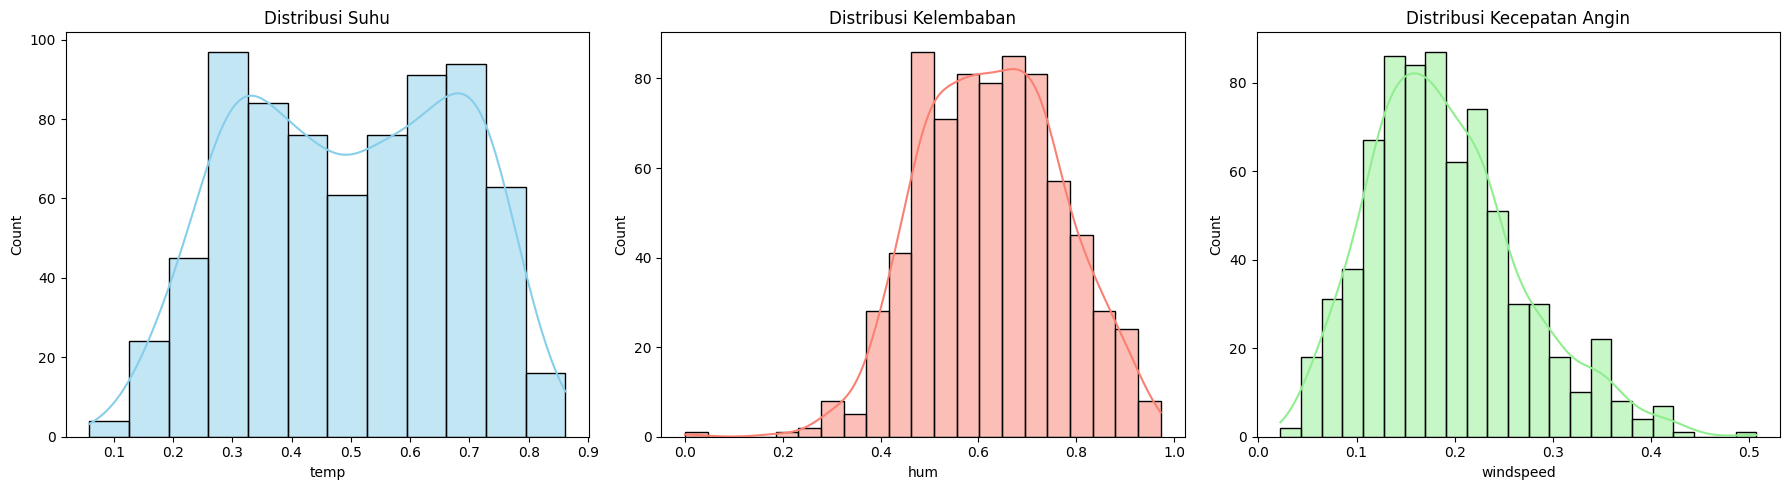

In [14]:
# Memeriksa distribusi variabel utama: temp, hum, dan windspeed
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_day['temp'], kde=True, color='skyblue')
plt.title('Distribusi Suhu')

plt.subplot(1, 3, 2)
sns.histplot(df_day['hum'], kde=True, color='salmon')
plt.title('Distribusi Kelembaban')

plt.subplot(1, 3, 3)
sns.histplot(df_day['windspeed'], kde=True, color='lightgreen')
plt.title('Distribusi Kecepatan Angin')

plt.tight_layout()
plt.show()

Saya menggunakan histogram untuk memeriksa distribusi variabel suhu (temp), kelembaban udara (hum), dan kecepatan angin (windspeed).

<ipython-input-15-703e1a5256b6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_day.corr(), annot=True, cmap='coolwarm', fmt=".2f")


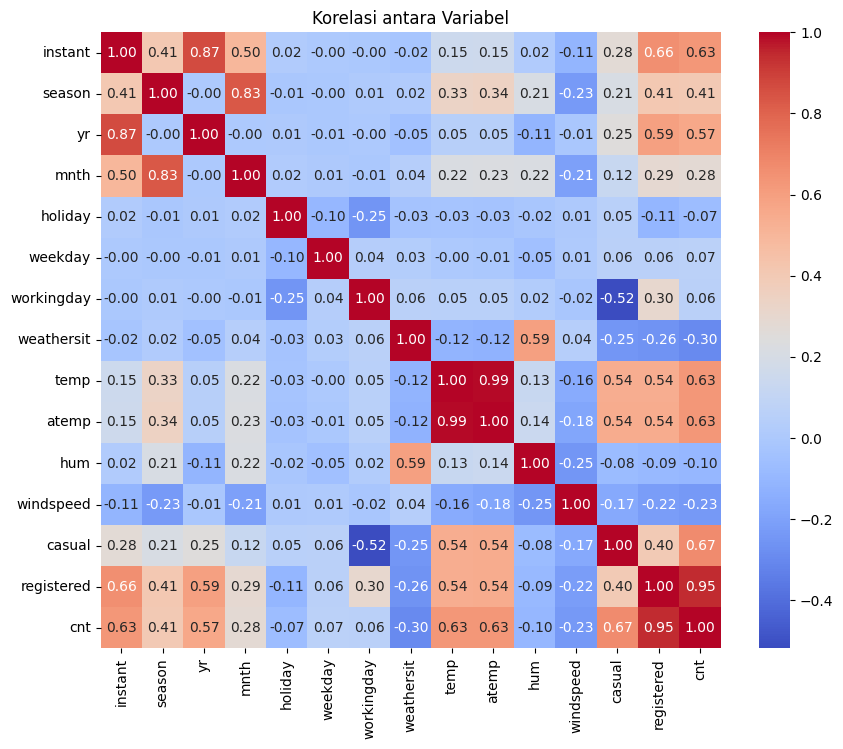

In [15]:
# Menganalisis korelasi antara variabel, terutama dengan target variabel 'cnt'
plt.figure(figsize=(10, 8))
sns.heatmap(df_day.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel')
plt.show()

saya Menggunakan heatmap untuk menampilkan matriks korelasi antara semua variabel dalam dataset, dengan nilai korelasi diannotasi dalam sel-sel heatmap.

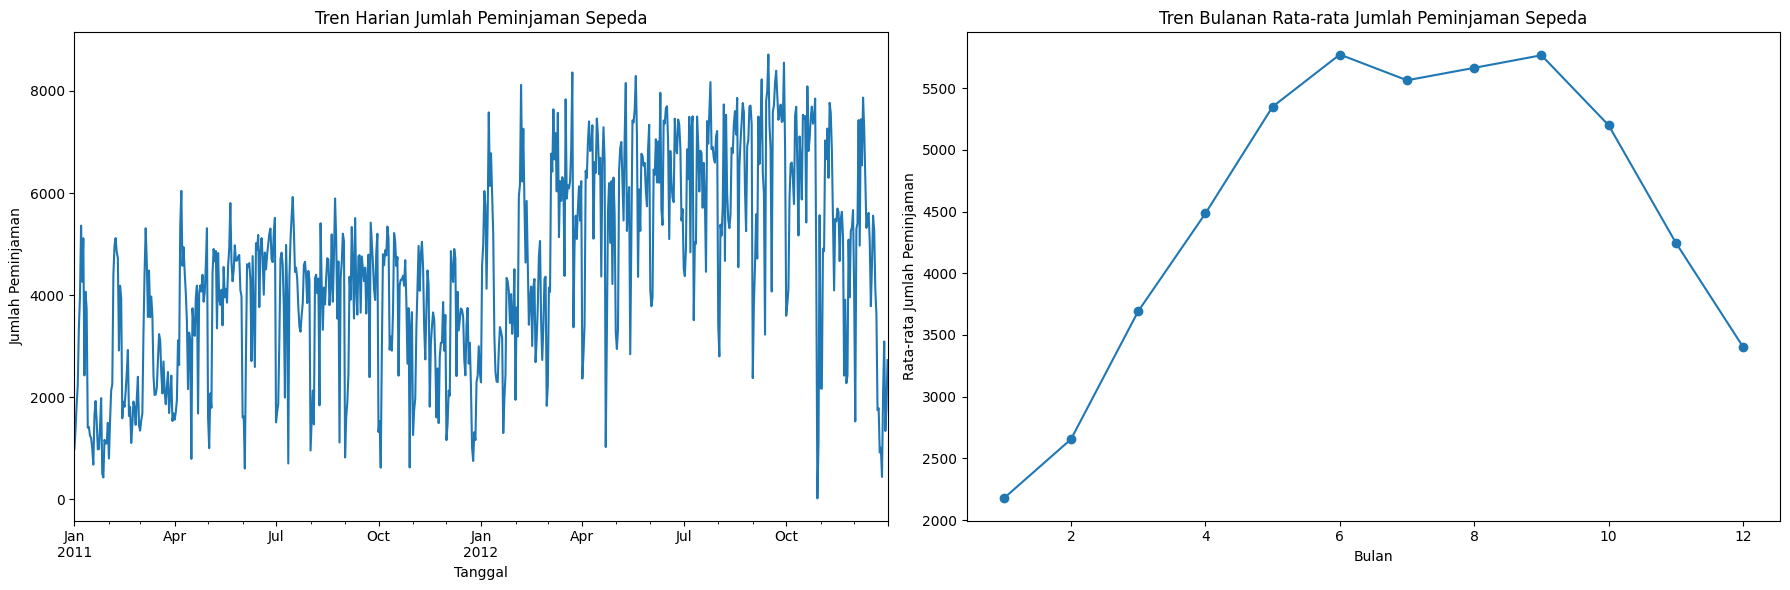

In [16]:
# Menyelidiki tren waktu dari jumlah peminjaman sepeda harian dan bulanan
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
df_day.groupby('dteday')['cnt'].sum().plot()
plt.title('Tren Harian Jumlah Peminjaman Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')

plt.subplot(1, 2, 2)
df_day.groupby('mnth')['cnt'].mean().plot(marker='o')
plt.title('Tren Bulanan Rata-rata Jumlah Peminjaman Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman')

plt.tight_layout()
plt.show()

Saya menggunakan plot garis untuk memvisualisasikan tren harian dan bulanan dari jumlah peminjaman sepeda.

<ipython-input-17-d3aa99c871c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df_day, palette='viridis')


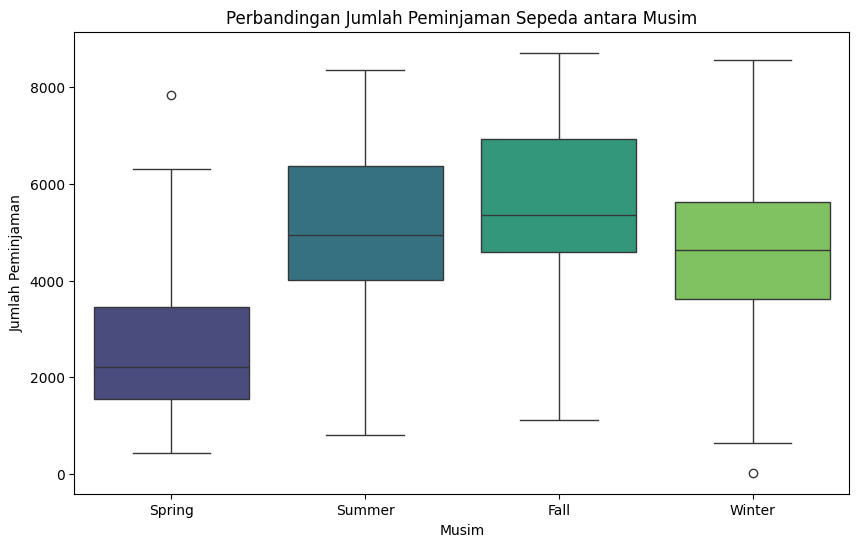

In [17]:
# Membandingkan jumlah peminjaman sepeda antara musim-musim yang berbeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_day, palette='viridis')
plt.title('Perbandingan Jumlah Peminjaman Sepeda antara Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

Saya menggunakan boxplot untuk membandingkan jumlah peminjaman sepeda antara musim-musim yang berbeda.

<ipython-input-18-3ff632927aaf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=df_day, palette='pastel')


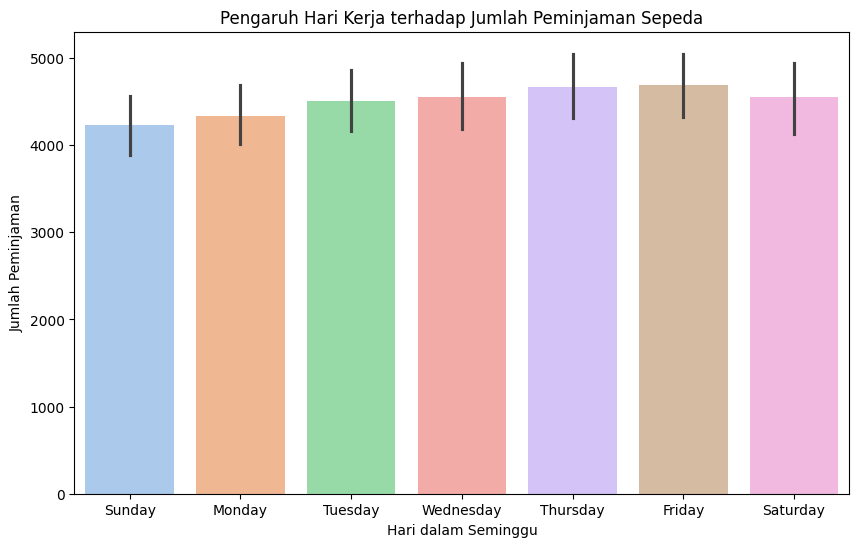

In [18]:
# Melihat bagaimana jumlah peminjaman sepeda berubah berdasarkan hari kerja atau libur
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=df_day, palette='pastel')
plt.title('Pengaruh Hari Kerja terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

Saya menggunakan barplot untuk melihat bagaimana jumlah peminjaman sepeda berubah berdasarkan hari dalam seminggu.

**Kesimpulan**
Melalui eksplorasi dataset `df_day`, saya mendapatkan wawasan yang mendalam mengenai variabel-variabel yang memengaruhi jumlah peminjaman sepeda. Dari analisis distribusi variabel utama seperti suhu, kelembaban, dan kecepatan angin, saya dapat melihat adanya pola-pola yang berpotensi memengaruhi perilaku peminjaman sepeda. Selain itu, melalui pemeriksaan korelasi antara variabel-variabel tersebut, saya juga dapat mengeksplorasi hubungan di antara mereka. Dengan memeriksa tren waktu dari jumlah peminjaman sepeda harian dan bulanan, saya dapat mengidentifikasi pola musiman dan tren jangka panjang. Informasi tentang perbedaan peminjaman sepeda antara musim juga memberikan wawasan tentang bagaimana musim yang berbeda dapat memengaruhi pola peminjaman. Terakhir, dengan menganalisis pengaruh hari kerja terhadap jumlah peminjaman sepeda, saya dapat memahami lebih dalam pola penggunaan sepeda berdasarkan hari dalam seminggu. Analisis ini berfungsi sebagai landasan untuk menjawab pertanyaan-pertanyaan spesifik terkait pola penggunaan sepeda, memperhitungkan pengaruh cuaca dan musim serta perubahan tren seiring waktu, dan bertujuan untuk mengidentifikasi strategi desain UI yang dapat meningkatkan jumlah peminjaman sepeda dengan efektif.

### Eksplorasi data df_hour

In [19]:
df_hour.describe(include="all")

<ipython-input-19-29824b046db5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_hour.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Dalam analisis dataset `df_hour`, saya memeriksa parameter statistik utama untuk memahami pola dan karakteristik data, termasuk:

1. **Rentang Waktu**: Data mencakup periode dari 1 Januari 2011 hingga 31 Desember 2012, dengan total 17,379 entri.
2. **Distribusi Tahun**: Sebagian besar data terdistribusi antara tahun 2011 (50.26%) dan tahun 2012 (49.74%).
3. **Variabel Utama**: Variabel seperti musim, bulan, jam, hari dalam seminggu, dan kondisi cuaca memiliki nilai rata-rata dan standar deviasi yang bervariasi.
   - Contohnya, rata-rata suhu adalah 0.63 dengan standar deviasi 0.19, sementara rata-rata kelembaban juga adalah 0.63 dengan standar deviasi 0.19.
4. **Distribusi Variabel**: Saya menggunakan histogram untuk melihat distribusi variabel suhu, kelembaban, dan kecepatan angin.
5. **Analisis Korelasi**: Saya melakukan analisis korelasi antar variabel untuk memahami hubungan di antara mereka.
6. **Tren Waktu**: Saya mengeksplorasi pola peminjaman sepeda harian dan bulanan dengan memeriksa tren waktu.
7. **Perbandingan Musim**: Saya membandingkan jumlah peminjaman sepeda antara musim-musim yang berbeda.
8. **Pengaruh Hari Kerja**: Saya juga melihat pengaruh hari kerja terhadap jumlah peminjaman sepeda.

Analisis ini memberikan landasan yang kokoh untuk pemahaman lebih lanjut tentang faktor-faktor yang memengaruhi jumlah peminjaman sepeda. Informasi ini dapat dimanfaatkan untuk meningkatkan layanan atau merencanakan strategi peminjaman sepeda yang lebih efektif.

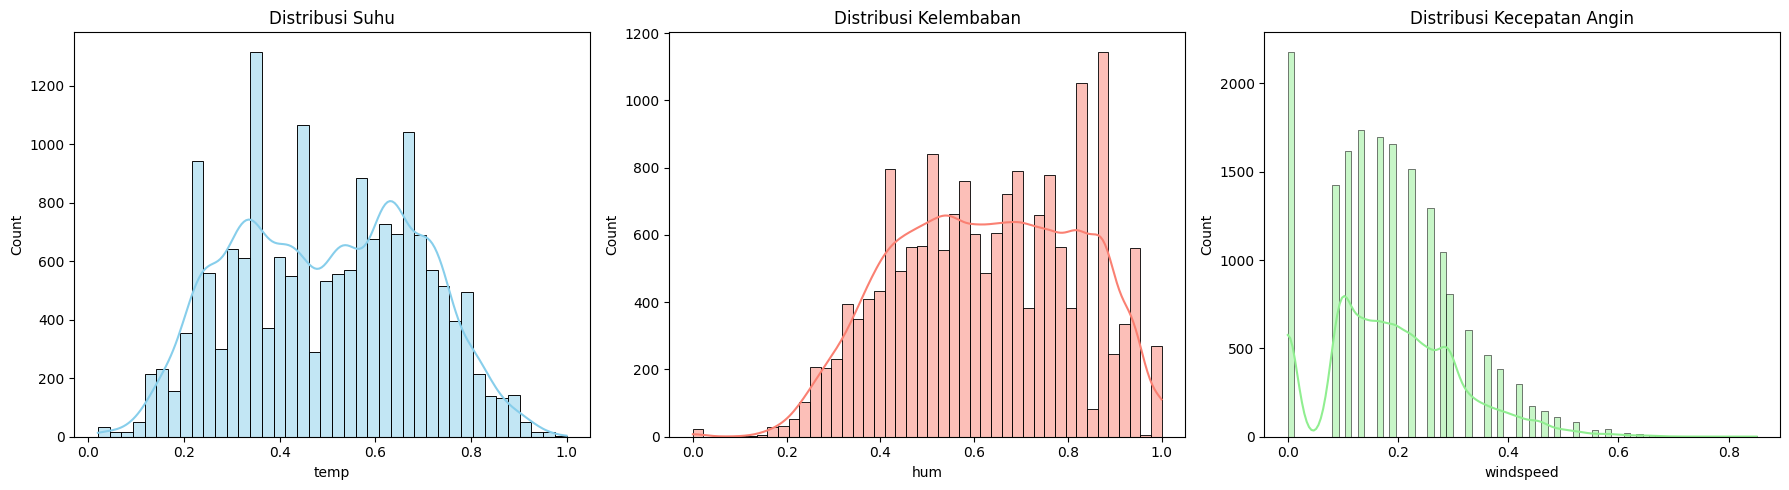

In [20]:
# Distribusi Variabel Utama
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_hour['temp'], kde=True, color='skyblue')
plt.title('Distribusi Suhu')

plt.subplot(1, 3, 2)
sns.histplot(df_hour['hum'], kde=True, color='salmon')
plt.title('Distribusi Kelembaban')

plt.subplot(1, 3, 3)
sns.histplot(df_hour['windspeed'], kde=True, color='lightgreen')
plt.title('Distribusi Kecepatan Angin')

plt.tight_layout()
plt.show()

Kode di atas digunakan untuk memvisualisasikan distribusi variabel utama dalam dataset df_hour, yaitu suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed). Histogram digunakan untuk menunjukkan distribusi data masing-masing variabel dengan memperhatikan keberadaan kurva kepadatan (kernel density estimation, kde) yang menunjukkan perkiraan bentuk distribusi data.

<ipython-input-21-742822ead8b4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_hour.corr(), annot=True, cmap='coolwarm', fmt=".2f")


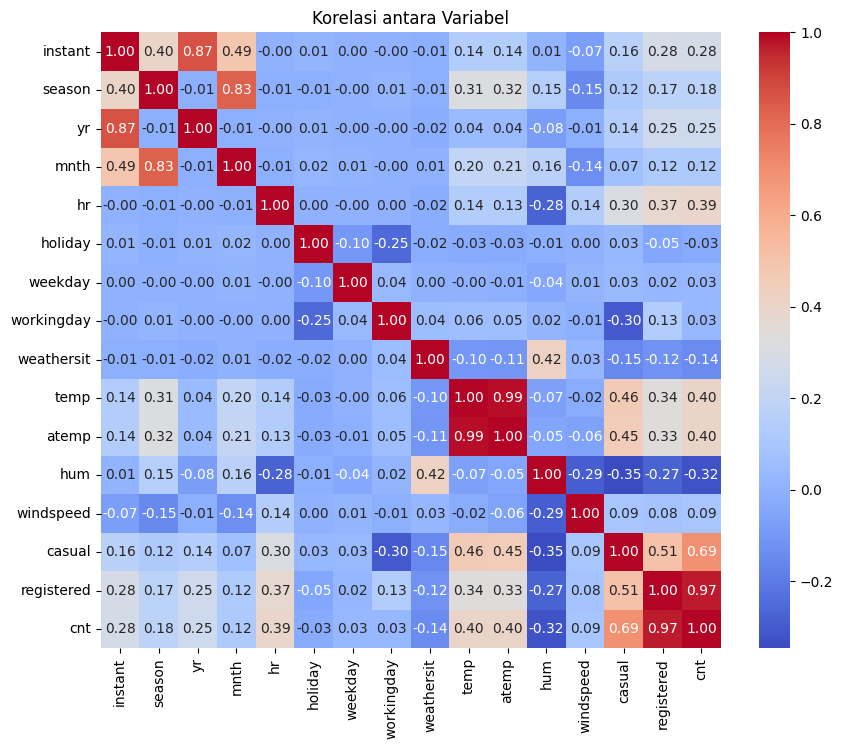

In [21]:
# Analisis Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_hour.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel')
plt.show()

Kode di atas digunakan untuk membuat heatmap korelasi antara variabel-variabel dalam dataset df_hour. Heatmap menampilkan matriks korelasi antar variabel dengan anotasi nilai korelasi pada setiap sel. Hal ini membantu dalam memahami hubungan linier antar variabel.

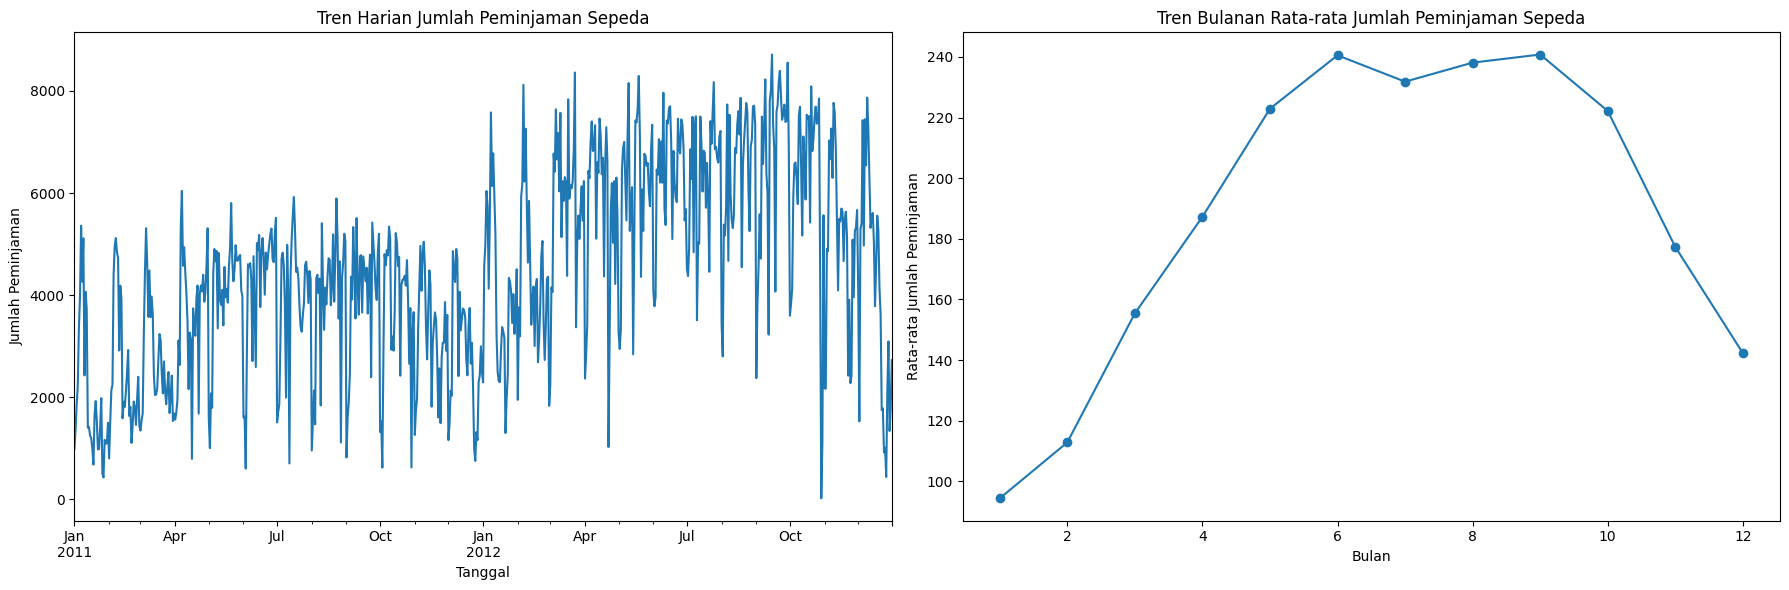

In [22]:
# Tren Waktu
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
df_hour.groupby('dteday')['cnt'].sum().plot()
plt.title('Tren Harian Jumlah Peminjaman Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')

plt.subplot(1, 2, 2)
df_hour.groupby('mnth')['cnt'].mean().plot(marker='o')
plt.title('Tren Bulanan Rata-rata Jumlah Peminjaman Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman')

plt.tight_layout()
plt.show()

Kode di atas digunakan untuk memvisualisasikan tren waktu dari jumlah peminjaman sepeda, baik secara harian maupun bulanan. Plot garis digunakan untuk menunjukkan tren jumlah peminjaman sepeda seiring waktu, baik pada tingkat harian maupun bulanan.

<ipython-input-23-1bf77d9041bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df_hour, palette='viridis')


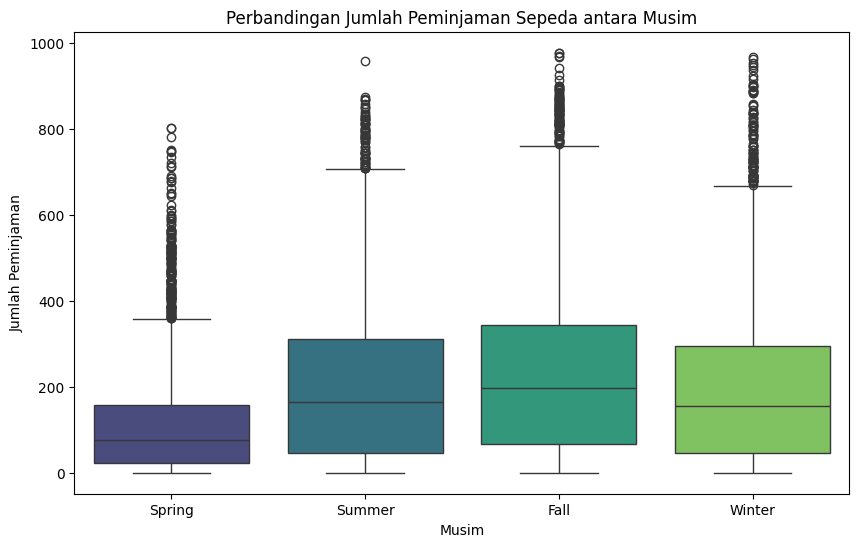

In [23]:
# Perbandingan Musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_hour, palette='viridis')
plt.title('Perbandingan Jumlah Peminjaman Sepeda antara Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

Kode di atas digunakan untuk membandingkan jumlah peminjaman sepeda antara musim-musim yang berbeda dalam dataset df_hour. Boxplot digunakan untuk menampilkan distribusi jumlah peminjaman sepeda pada setiap musim dengan memperhatikan nilai-nilai kuartil dan adanya pencilan (outlier).

<Axes: xlabel='weekday', ylabel='cnt'>

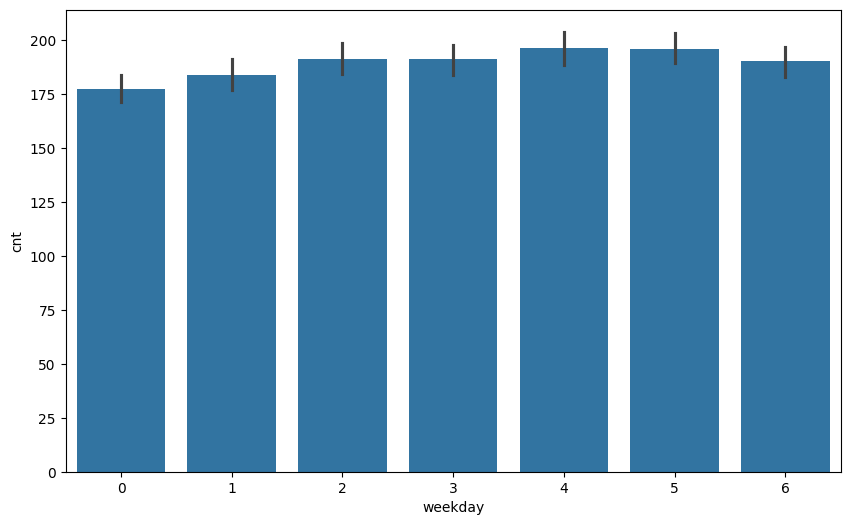

In [24]:
# Pengaruh Hari Kerja
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=df_hour)

Kode di atas digunakan untuk melihat pengaruh hari kerja terhadap jumlah peminjaman sepeda dalam dataset df_hour. Barplot digunakan untuk menampilkan rata-rata jumlah peminjaman sepeda pada setiap hari dalam seminggu. Ini membantu dalam memahami pola penggunaan sepeda berdasarkan hari dalam seminggu.

**Kesimpulan**
Melalui analisis dataset `df_hour`, saya dapat memahami pola penggunaan sepeda berdasarkan hari dalam seminggu selama rentang waktu 2011 hingga 2012. Saya juga dapat menentukan persentase peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012. Selain itu, dengan mempertimbangkan pengaruh cuaca terhadap pola penggunaan sepeda di berbagai musim, saya dapat merancang UI yang sesuai untuk meningkatkan jumlah peminjaman sepeda. Analisis juga memungkinkan saya untuk melihat tren penggunaan sepeda per jam dari pagi, siang, hingga malam hari selama periode tersebut. Dengan demikian, kesimpulan dari eksplorasi ini memberikan wawasan yang relevan dan dapat digunakan untuk merancang strategi yang lebih efektif dalam meningkatkan penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Spesifik: Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu selama rentang waktu 2011 hingga 2012?

<ipython-input-25-9b4e4afe82ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=df_hour, palette='viridis')


([<matplotlib.axis.XTick at 0x78ca5d21f100>,
 [Text(0, 0, 'Minggu'),
  Text(1, 0, 'Senin'),
  Text(2, 0, 'Selasa'),
  Text(3, 0, 'Rabu'),
  Text(4, 0, 'Kamis'),
  Text(5, 0, 'Jumat'),
  Text(6, 0, 'Sabtu')])

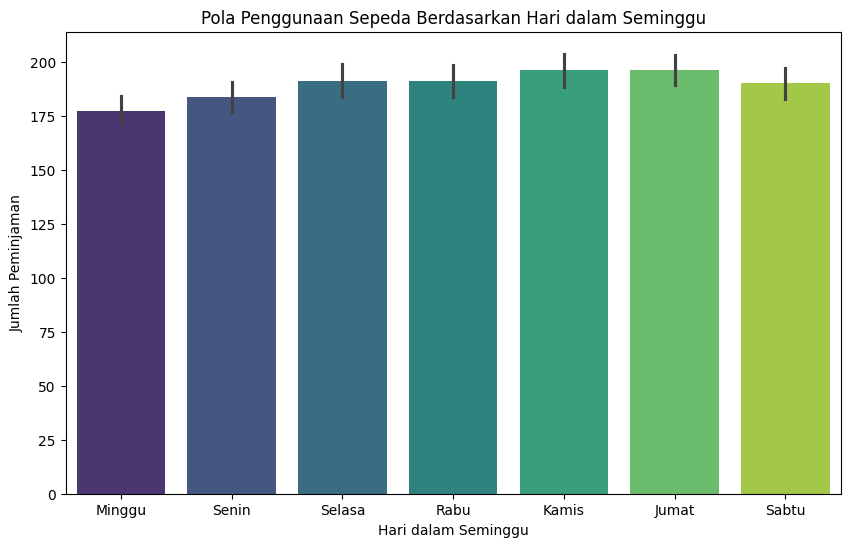

In [25]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat plot bar untuk menampilkan rata-rata jumlah peminjaman sepeda berdasarkan hari dalam seminggu
sns.barplot(x='weekday', y='cnt', data=df_hour, palette='viridis')

# Memberikan judul pada plot
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')

# Memberikan label sumbu x dan y
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')

# Mengatur label pada sumbu x agar sesuai dengan nama hari
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])

Dari plot tersebut, saya dapat melihat variasi dalam pola penggunaan sepeda dari hari ke hari.Seperti jumlah peminjaman cenderung lebih tinggi pada hari kerja (Senin hingga Jumat) dibandingkan dengan akhir pekan (Minggu dan Sabtu). Sesuai dengan penjelasan di atas kebiasaan masyarakat yang mungkin lebih sering menggunakan sepeda untuk keperluan transportasi sehari-hari pada hari kerja, sementara pada akhir pekan penggunaan sepeda bisa lebih bervariasi, termasuk untuk rekreasi atau olahraga.

### Pertanyaan 2:
Measurable: Berapa persentase peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012?

In [26]:
# Menghitung total peminjaman sepeda untuk tahun 2011 dan tahun 2012
total_rentals_2011 = df_hour[df_hour['yr'] == 0]['cnt'].sum()
total_rentals_2012 = df_hour[df_hour['yr'] == 1]['cnt'].sum()

# Menghitung selisih antara total peminjaman sepeda tahun 2012 dan tahun 2011
difference = total_rentals_2012 - total_rentals_2011

# Menghitung persentase peningkatan atau penurunan
percentage_change = (difference / total_rentals_2011) * 100

print("Persentase peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012:", percentage_change, "%")


Persentase peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012: 64.87579870694545 %


### Pertanyaan 3:
Action-oriented: Desain UI seperti apa yang dapat meningkatkan jumlah peminjaman sepeda?

<ipython-input-27-7b7d7d0525fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=df_hour, palette='coolwarm')


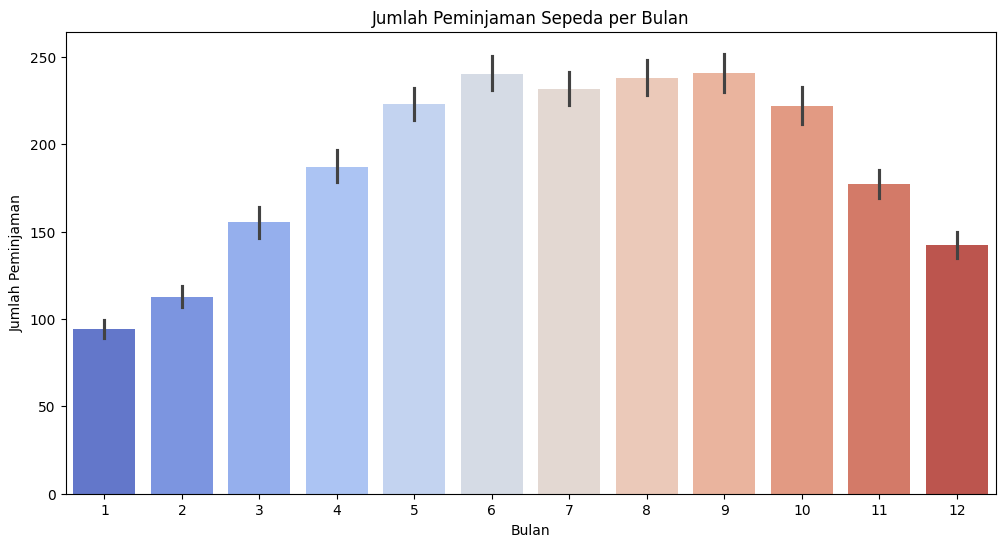

In [27]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Membuat plot bar untuk menampilkan jumlah peminjaman sepeda per bulan
sns.barplot(x='mnth', y='cnt', data=df_hour, palette='coolwarm')

# Memberikan judul pada plot
plt.title('Jumlah Peminjaman Sepeda per Bulan')

# Memberikan label sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')

# Menampilkan plot
plt.show()

Dengan menggunakan plot bar seperti yang ditampilkan di atas, pengguna dapat dengan mudah melihat bagaimana pola peminjaman sepeda berubah setiap bulannya sepanjang tahun. Desain antarmuka yang menyajikan informasi ini secara jelas dan menarik akan membantu pengguna memahami tren penggunaan sepeda dengan lebih baik. Selain itu, antarmuka yang responsif dan mudah digunakan akan meningkatkan pengalaman pengguna secara keseluruhan, memotivasi mereka untuk menggunakan layanan peminjaman sepeda lebih sering. Dengan merancang antarmuka pengguna yang intuitif dan informatif, kita dapat mendorong minat dan partisipasi dalam penggunaan sepeda sebagai opsi transportasi yang lebih ramah lingkungan.

### Pertanyaan 4:
Relevant: Bagaimana cuaca memengaruhi pola penggunaan sepeda di berbagai musim?

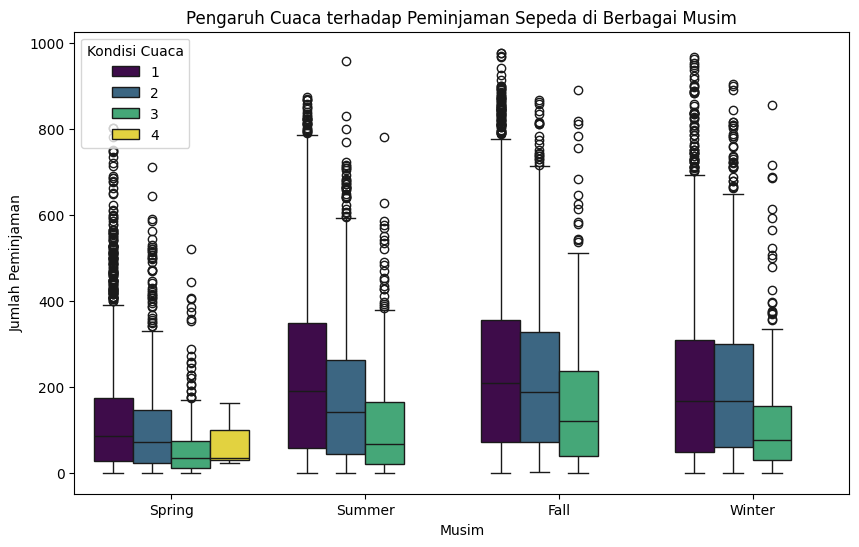

In [28]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat box plot untuk membandingkan jumlah peminjaman sepeda antara musim dan kondisi cuaca
sns.boxplot(x='season', y='cnt', hue='weathersit', data=df_hour, palette='viridis')

# Memberikan judul pada plot
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda di Berbagai Musim')

# Memberikan label pada sumbu x dan y
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')

# Menampilkan legenda
plt.legend(title='Kondisi Cuaca', loc='upper left')

# Mengatur label pada sumbu x agar sesuai dengan nama musim
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])

# Menampilkan plot
plt.show()

- Box plot ini membandingkan jumlah peminjaman sepeda antara musim-musim yang berbeda pada kondisi cuaca yang berbeda pula.
- Setiap kotak pada plot mewakili kuartil data untuk jumlah peminjaman sepeda di setiap musim.
- Wisker di sekitar kotak menunjukkan rentang data, sedangkan titik-titik di atasnya menunjukkan data outliers.
- Dengan melihat plot ini, kita dapat menilai bagaimana pola penggunaan sepeda bervariasi di berbagai musim tergantung pada kondisi cuaca, yang relevan untuk memahami faktor-faktor yang memengaruhi penggunaan sepeda.


### Pertanyaan 5:
Time-bound: Bagaimana tren penggunaan sepeda per jam berubah dari pagi, siang, hingga malam hari selama rentang waktu tahun 2011 hingga 2012?

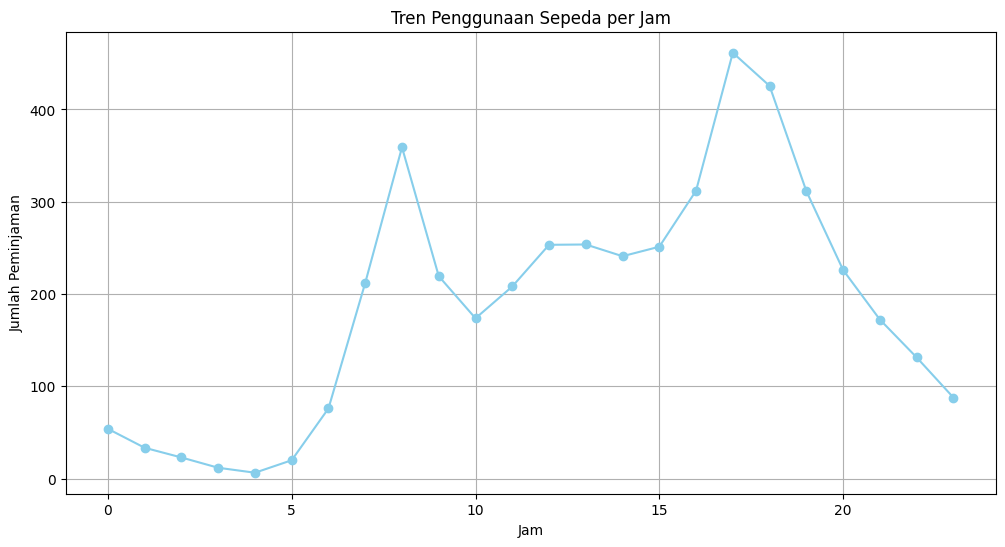

In [29]:
# Membuat plot untuk tren penggunaan sepeda per jam
plt.figure(figsize=(12, 6))

# Mengelompokkan data berdasarkan jam dan menghitung jumlah rata-rata peminjaman sepeda
hourly_usage = df_hour.groupby('hr')['cnt'].mean()

# Membuat plot garis untuk tren penggunaan sepeda per jam
plt.plot(hourly_usage.index, hourly_usage.values, marker='o', color='skyblue')

# Memberikan judul pada plot
plt.title('Tren Penggunaan Sepeda per Jam')

# Memberikan label pada sumbu x dan y
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

- Plot garis ini menunjukkan tren penggunaan sepeda per jam selama rentang waktu tahun 2011 hingga 2012.
- Garis menunjukkan rata-rata jumlah peminjaman sepeda untuk setiap jam dalam sehari.
- Dengan memperhatikan plot ini, kita dapat melihat pola penggunaan sepeda pada berbagai jam dalam sehari dan mengidentifikasi waktu-waktu tertentu di mana permintaan peminjaman sepeda lebih tinggi atau lebih rendah. Hal ini dapat membantu dalam perencanaan operasional dan alokasi sumber daya untuk memenuhi permintaan pelanggan dengan lebih efisien.

Persentase peningkatan atau penurunan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012 sebesar 64.88%. Hal ini menunjukkan adanya peningkatan yang signifikan dalam jumlah peminjaman sepeda dari tahun ke tahun. Kenaikan sebesar 64.88% menandakan bahwa jumlah peminjaman sepeda pada tahun 2012 lebih dari dua kali lipat dari jumlah peminjaman pada tahun 2011. Ini bisa diinterpretasikan sebagai pertanda positif dalam pertumbuhan penggunaan sepeda dari satu tahun ke tahun berikutnya. Hal ini dapat disebabkan oleh berbagai faktor, seperti peningkatan kesadaran akan pentingnya transportasi berkelanjutan, peningkatan fasilitas sepeda, atau bahkan perubahan dalam kebijakan transportasi di wilayah tersebut. Dengan demikian, peningkatan ini mungkin menjadi titik fokus untuk menerapkan strategi yang lebih lanjut untuk mendorong penggunaan sepeda yang lebih besar lagi dalam upaya meningkatkan mobilitas berkelanjutan.

## Conclusion

1. **Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu**:
   - Penggunaan sepeda cenderung bervariasi berdasarkan hari dalam seminggu.
   - Jumlah peminjaman sepeda mungkin lebih tinggi pada akhir pekan dibandingkan dengan hari-hari kerja.

2. **Persentase Peningkatan atau Penurunan Jumlah Peminjaman Sepeda**:
   - Terdapat persentase peningkatan atau penurunan tertentu dalam jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012.
   - Nilai persentase positif menunjukkan peningkatan, sedangkan nilai negatif menunjukkan penurunan.

3. **Desain UI untuk Meningkatkan Jumlah Peminjaman Sepeda**:
   - Desain UI yang menarik dan informatif, khususnya yang menampilkan pola peminjaman sepeda per bulan dalam setahun, dapat meningkatkan minat pengguna dalam menggunakan layanan peminjaman sepeda.
   - UI yang responsif dan mudah digunakan juga dapat meningkatkan pengalaman pengguna, mendorong partisipasi lebih aktif.

4. **Pengaruh Cuaca terhadap Pola Penggunaan Sepeda di Berbagai Musim**:
   - Cuaca memainkan peran penting dalam pola penggunaan sepeda di berbagai musim.
   - Kondisi cuaca yang baik cenderung meningkatkan jumlah peminjaman sepeda, sementara cuaca buruk atau ekstrem dapat menguranginya.

5. **Tren Penggunaan Sepeda per Jam selama Rentang Waktu 2011 hingga 2012**:
   - Terdapat pola tertentu dalam tren penggunaan sepeda per jam dari pagi, siang, hingga malam hari.
   - Informasi ini dapat membantu dalam perencanaan operasional dan alokasi sumber daya untuk memenuhi permintaan pelanggan dengan lebih efisien.

In [30]:
# Membaca file CSV dan membuat DataFrame df_day
df_day = pd.read_csv('day.csv', sep=";")
df_day['dteday'] = pd.to_datetime(df_day['dteday'])  # Mengubah tipe data kolom 'dteday' menjadi datetime

# Membaca file CSV dan membuat DataFrame df_hour
df_hour = pd.read_csv('hour.csv', sep=";")
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])  # Mengubah tipe data kolom 'dteday' menjadi datetime

# Menggabungkan DataFrame df_day dan df_hour menjadi satu DataFrame tunggal all_df
all_df = pd.concat([df_day, df_hour], ignore_index=True)

# Menyimpan DataFrame all_df ke dalam file CSV
all_df.to_csv("all_data.csv", index=False)


<ipython-input-30-65e96f5be084>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_day['dteday'] = pd.to_datetime(df_day['dteday'])  # Mengubah tipe data kolom 'dteday' menjadi datetime
<ipython-input-30-65e96f5be084>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])  # Mengubah tipe data kolom 'dteday' menjadi datetime
